<a href="https://colab.research.google.com/github/Adriana-Sousa/machine-learning/blob/main/processamento_de_imagens/processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Processamento de imagens

Projeto que converterá uma imagem JPG ou PNG para tons de cinza (0 a 255) e binarizada (0 ou 255), usando NumPy para manipulação de arrays e Matplotlib para exibir e salvar as imagens

* google.colab.files: Necessário no Colab para permitir que o usuário faça upload de arquivos do computador para o ambiente em nuvem.
* numpy: Usado para manipulação eficiente de arrays, permitindo cálculos rápidos nos pixels (ex., fórmula de luminância) sem loops lentos.
* PIL.Image: Usado apenas para carregar a imagem JPG/PNG, já que decodificar esses formatos manualmente exigiria implementar algoritmos complexos de descompressão
* matplotlib.pyplot: Usado para exibir as imagens no Colab e salvar os resultados como PNG, integrando bem com arrays NumPy.

In [1]:
from google.colab import files
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

## Baixar a imagem do pc
* files.upload(): Abre uma interface no Colab para o usuário selecionar a imagem.
* np.array(img): Converte a imagem PIL em um array NumPy com formato (altura, largura, 3) para imagens RGB, onde o último eixo contém os canais R, G, B.

In [3]:
# Faz upload da imagem
print("Por favor, faça upload de uma imagem JPG ou PNG.")
uploaded = files.upload()

# Carrega a imagem
input_file = list(uploaded.keys())[0]
img = Image.open(input_file)
image_array = np.array(img)

Por favor, faça upload de uma imagem JPG ou PNG.


Saving foto T2.PNG to foto T2.PNG


## Baixar a imagem da internet

In [11]:
import requests
from io import BytesIO

def get_image_from_url(url):
    try:
        # Adicionar cabeçalho User-Agent para evitar bloqueios
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

        # Baixar a imagem
        response = requests.get(url, headers=headers, timeout=10)

        # Verificar se a requisição foi bem-sucedida
        if response.status_code != 200:
            raise ValueError(f"Erro ao baixar a imagem: Status {response.status_code}")

        # Verificar se o conteúdo é uma imagem válida
        content_type = response.headers.get('content-type', '')
        if 'image' not in content_type:
            raise ValueError(f"URL não aponta para uma imagem válida: {content_type}")

        # Tentar abrir a imagem
        img = Image.open(BytesIO(response.content)).convert('RGB')

    except requests.exceptions.RequestException as e:
        print(f"Erro ao baixar a imagem: {e}")
    except ValueError as e:
        print(f"Erro: {e}")
    except Exception as e:
        print(f"Erro ao processar a imagem: {e}")
    return img

url = "https://images.unsplash.com/photo-1500479694472-551d1fb6258d?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxzZWFyY2h8Mzl8fGFuaW1haXN8ZW58MHx8MHx8fDA%3D"
img = get_image_from_url(url)
image_array = np.array(img)

## Conversão para tons de cinza

* Define uma função que converte a imagem RGB (array 3D) para tons de cinza (array 2D) usando a fórmula de luminância.
* Aplica a função ao image_array para obter a imagem em tons de cinza.

* Fórmula de luminância (0.299R + 0.587G + 0.114B): É um padrão na visão computacional, pois reflete a percepção humana de brilho. O verde tem maior peso (0.587) porque o olho humano é mais sensível a ele, seguido de vermelho (0.299) e azul (0.114).
* image_array[:, :, 0]: Seleciona o canal vermelho (R). Os índices [:, :, 1] e [:, :, 2] selecionam os canais verde (G) e azul (B), respectivamente.
* NumPy: A multiplicação e soma são feitas elemento a elemento em todo o array, o que é muito mais rápido do que loops em Python puro, especialmente para imagens grandes.
* .astype(np.uint8): Converte os valores para inteiros de 8 bits (0 a 255), que é o formato padrão para imagens em tons de cinza, garantindo compatibilidade com exibição e salvamento.

In [12]:
def to_grayscale(image_array):
    """Converte a imagem RGB para tons de cinza usando a fórmula de luminância."""
    # Fórmula de luminância: 0.299R + 0.587G + 0.114B
    grayscale = (0.299 * image_array[:, :, 0] + 0.587 * image_array[:, :, 1] + 0.114 * image_array[:, :, 2]).astype(np.uint8)
    return grayscale

# Aplica a conversão
grayscale_image = to_grayscale(image_array)

## Binarização

* Define uma função que converte a imagem em tons de cinza para preto (0) ou branco (255) com base em um limiar (padrão 128).
* Aplica a função à imagem em tons de cinza.

* Limiar de 128: É o ponto médio da escala 0-255, fornecendo uma divisão equilibrada entre preto e branco. Pixels com intensidade ≥ 128 tornam-se brancos (255), e < 128 tornam-se pretos (0).
* np.where: Uma função vetorizada do NumPy que aplica a condição grayscale_image >= threshold a todos os pixels, definindo 255 para verdadeiro e 0 para falso. É extremamente eficiente comparado a loops.
* .astype(np.uint8): Garante que os valores sejam 0 ou 255, compatíveis com o formato de imagem.

In [13]:
def to_binary(grayscale_image, threshold=128):
    """Converte a imagem em tons de cinza para preto e branco com base em um limiar."""
    binary_image = np.where(grayscale_image >= threshold, 255, 0).astype(np.uint8)
    return binary_image

# Aplica a binarização
binary_image = to_binary(grayscale_image)

## Exibir as imagens

* plt.figure(figsize=(15, 5)): Cria uma figura de 15x5 polegadas para exibir as três imagens em uma linha, proporcionando uma visualização clara.
* plt.subplot(1, 3, n): Divide a figura em 1 linha e 3 colunas, com n indicando a posição (1 para original, 2 para tons de cinza, 3 para binarizada).
plt.imshow:
* Para a imagem original (image_array), exibe em cores RGB, já que é um array 3D (altura, largura, 3).
Para tons de cinza e binarizada, usa cmap='gray' para interpretar os valores do array 2D como intensidades de cinza.
* plt.axis('off'): Remove os eixos para uma visualização mais limpa, focando nas imagens.

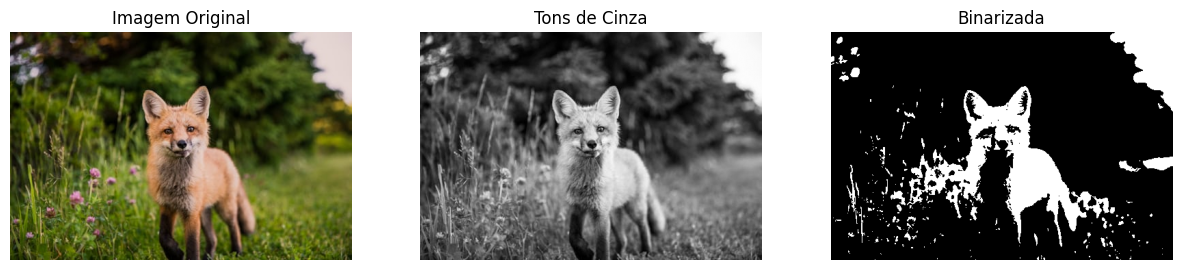

In [14]:
# Exibe as imagens
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Imagem Original")
plt.imshow(image_array)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Tons de Cinza")
plt.imshow(grayscale_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Binarizada")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.show()

In [ ]:
# Salva as imagens
plt.imsave('grayscale.png', grayscale_image, cmap='gray')
plt.imsave('binary.png', binary_image, cmap='gray')

# Faz download das imagens
files.download('grayscale.png')
files.download('binary.png')